In [1]:
# Start by uploading some libraries we might need

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Upload data

In [4]:
lingerieData = pd.read_csv("Lingerie_Data.csv")
lingerieData.head()

,ProductName,Price,BrandName,ProductCategory,SuperCategory,Retailer,Description,StyleAttributes,TotalSizes,AvailSize,Color,Rating
0,Aerie Adjustable Low-Back Strap,11,Aerie,Strapless Bra,Bras,American Eagle,Quick Fixes® Collection: Endless options for e...,"[""2 sets of straps included: 1 nude, 1 black"",...","[""One Size""]","[""One Size""]",Multi,3.0
1,Aerie Adjustable Low-Back Strap,11,Aerie,Strapless Bra,Bras,American Eagle,Quick Fixes® Collection: Endless options for e...,"[""2 sets of straps included: 1 nude, 1 black"",...","[""One Size""]","[""One Size""]",Multi,3.0
2,Aerie Adjustable Low-Back Strap,11,Aerie,Strapless Bra,Bras,American Eagle,Quick Fixes® Collection: Endless options for e...,"[""2 sets of straps included: 1 nude, 1 black"",...","[""One Size""]","[""One Size""]",Multi,3.0
3,Aerie Adjustable Low-Back Strap,11,Aerie,Strapless Bra,Bras,American Eagle,Quick Fixes® Collection: Endless options for e...,"[""2 sets of straps included: 1 nude, 1 black"",...","[""One Size""]","[""One Size""]",Multi,3.0
4,Aerie Adjustable Low-Back Strap,11,Aerie,Strapless Bra,Bras,American Eagle,Quick Fixes® Collection: Endless options for e...,"[""2 sets of straps included: 1 nude, 1 black"",...","[""One Size""]","[""One Size""]",Multi,3.0


In [5]:
lingerieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46729 entries, 0 to 46728
Data columns (total 12 columns):
ProductName        46729 non-null object
Price              46729 non-null int64
BrandName          46729 non-null object
ProductCategory    46729 non-null object
SuperCategory      46729 non-null object
Retailer           46729 non-null object
Description        46729 non-null object
StyleAttributes    46729 non-null object
TotalSizes         46729 non-null object
AvailSize          46729 non-null object
Color              46729 non-null object
Rating             26823 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 4.3+ MB


In [6]:
lingerieData.describe()

,Price,Rating
count,46729.000000,26823.000000
mean,22.380042,4.458606
std,12.633729,0.689297
min,4.000000,1.000000
25%,13.000000,4.100000
50%,20.000000,4.700000
75%,30.000000,5.000000
max,82.000000,5.000000


In [7]:
# I know there are NA's, though, so let's give them a value
# Find them first
print(lingerieData.isnull().sum())

ProductName            0
Price                  0
BrandName              0
ProductCategory        0
SuperCategory          0
Retailer               0
Description            0
StyleAttributes        0
TotalSizes             0
AvailSize              0
Color                  0
Rating             19906
dtype: int64


In [8]:
# Rating and ReviewCount have NaN's, as I expected.
# Rather than have a ton of product with no reviews, let's fill in with mean values
# Choosing to do this because NaN's mean only that customers haven't reviewed the items
# Does not mean there is no sentiment from customers regarding product
# Let's be honest, women have definite feelings about their lingerie!

In [9]:
# Replace NaN's with mean column values
lingerieData.fillna(lingerieData.Rating.mean(), inplace=True)

In [10]:
# Check for NaN's
print(lingerieData.isnull().sum())

ProductName        0
Price              0
BrandName          0
ProductCategory    0
SuperCategory      0
Retailer           0
Description        0
StyleAttributes    0
TotalSizes         0
AvailSize          0
Color              0
Rating             0
dtype: int64


In [11]:
# Check values now
lingerieData.describe()

,Price,Rating
count,46729.000000,46729.000000
mean,22.380042,4.458606
std,12.633729,0.522232
min,4.000000,1.000000
25%,13.000000,4.458606
50%,20.000000,4.458606
75%,30.000000,4.800000
max,82.000000,5.000000


In [12]:
# Let's do some basic EDA
# Number of items in each Product Category
lingerieData.groupby('ProductCategory')['ProductCategory'].count()

ProductCategory
Balconette Bra         168
Bandeau                730
Bikini                4045
Boybrief              6055
Boyshort              3795
Bralette              8813
Brief                 1090
Demi Bra               750
Full Coverage Bra      567
G-String               190
Hipster               1242
Lightly Lined Bra      936
Pushup Bra            2024
Strapless Bra          215
Tanga                 2005
Thong                12254
Unlined Bra           1493
Wireless Bra           357
Name: ProductCategory, dtype: int64

In [22]:
# Thongs have the most offerings in panties
# Bralettes have the most options in bras

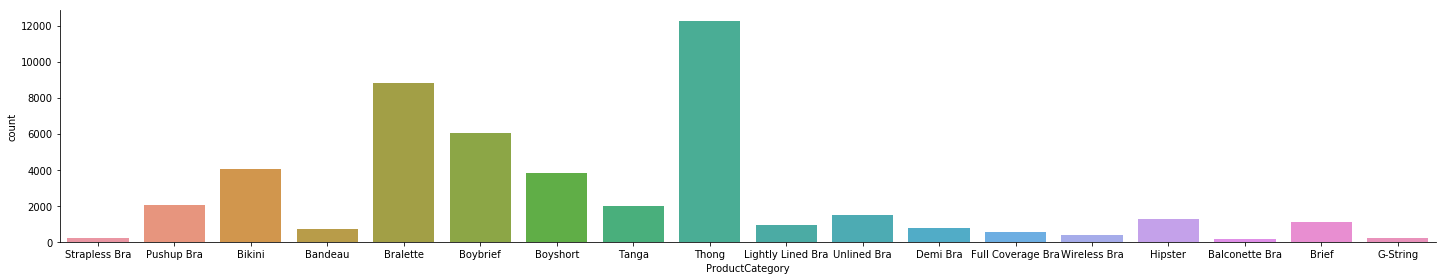

In [23]:
# Let's use seaborn to plot the count of items in each Product Category 
fg = sns.factorplot('ProductCategory', data=lingerieData, kind='count', aspect=5)
fg.set_xlabels('ProductCategory')

In [24]:
# Let's see which brand has the highest number of unique items available
lingerieData.groupby('BrandName')['BrandName'].count()

BrandName
Aerie           24009
Calvin Klein     2711
HankyPanky      17888
Wacoal           2121
Name: BrandName, dtype: int64

In [25]:
# AERIE wins

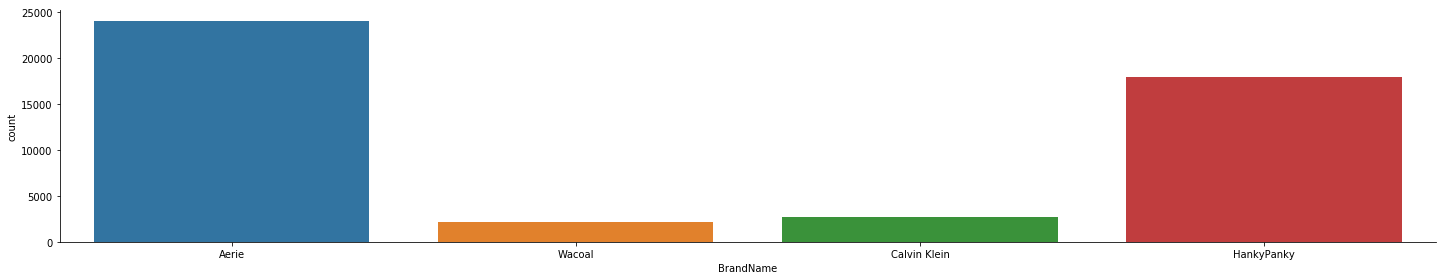

In [26]:
# Let's plot that
sns.factorplot('BrandName', data=lingerieData, kind='count', aspect=5)

In [27]:
# Let's combine that
# Number of product in each brand 
lingerieData.groupby(['BrandName', 'ProductCategory'])['BrandName'].count()

BrandName     ProductCategory  
Aerie         Bandeau               655
              Bikini               1071
              Boybrief             6055
              Boyshort              717
              Bralette             5503
              Demi Bra              506
              Full Coverage Bra     370
              Lightly Lined Bra     936
              Pushup Bra           1822
              Strapless Bra         172
              Tanga                1891
              Thong                2608
              Unlined Bra          1368
              Wireless Bra          335
Calvin Klein  Bandeau                 1
              Bikini                519
              Boyshort               61
              Bralette              401
              Demi Bra              166
              Full Coverage Bra      74
              Hipster               630
              Pushup Bra            130
              Tanga                   8
              Thong                 654
        

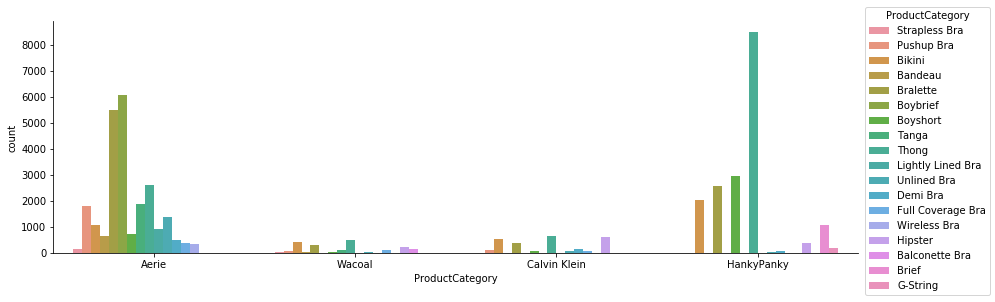

In [28]:
# And illustrate that as a chart
g = sns.factorplot('BrandName', data=lingerieData, hue='ProductCategory', kind='count', aspect=3)
g.set_xlabels('ProductCategory')

In [29]:
# Let's try some code to dig a little deeper
# Break it down by product in each Category
# Shows how many variations of each product name in each product category
lingerieData.groupby(['BrandName', 'ProductCategory', 'ProductName'])['BrandName'].count()

BrandName  ProductCategory    ProductName                                       
Aerie      Bandeau            Aerie Boho Bandeau                                      52
                              Happy Unlined Bandeau Bra                              297
                              Sunnie Unlined Bandeau Bra                             306
           Bikini             Aerie Bikini                                           460
                              Aerie Everyday Loves Lace Bikini                        97
                              Aerie Hi-Leg Bikini                                    157
                              Aerie Logo Bikini                                        7
                              Aerie Shine Bikini + Boho Lace                         221
                              Aerie String Bikini                                    129
           Boybrief           Aerie Boybrief                                        2315
                             

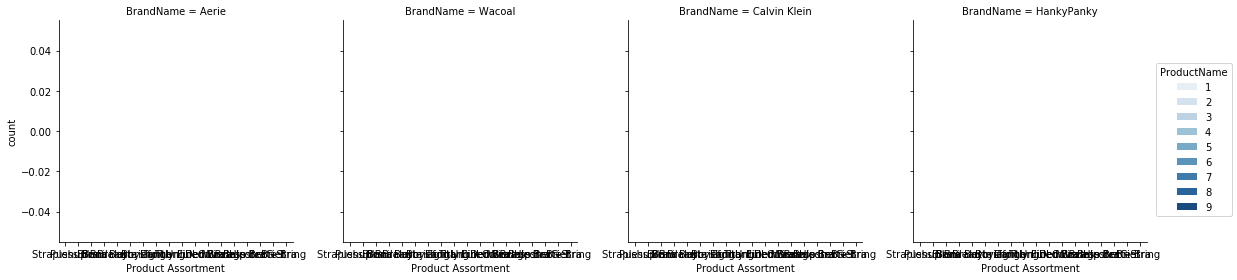

In [30]:
# Let's try to factor plot this data
fg = sns.factorplot('ProductCategory', data=lingerieData, kind='count', hue='ProductName', col='BrandName', hue_order=range(1,10),
                 palette='Blues')
fg.set_xlabels('Product Assortment')

In [31]:
# Can't really see anything, too small
# But it worked!

In [32]:
# Let's try to see available sizes for each of these product categories at each brand
lingerieData.pivot_table('AvailSize', 'BrandName', 'ProductCategory', aggfunc=np.sum, margins=True)

ProductCategory,Balconette Bra,Bandeau,Bikini,Boybrief,Boyshort,Bralette,Brief,Demi Bra,Full Coverage Bra,G-String,Hipster,Lightly Lined Bra,Pushup Bra,Strapless Bra,Tanga,Thong,Unlined Bra,Wireless Bra,All
BrandName,,,,,,,,,,,,,,,,,,,
Aerie,None,"[""XS"", ""S"", ""M"", ""L"", ""XL""][""S"", ""M"", ""L"", ""XL...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""XS"", ""S"", ""M"", ""L...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""][""XS"", ""S"", ...","[""XXS"", ""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""][""XXS...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""S"", ""M"", ""L"", ""XL...",None,"[""30A"", ""30B"", ""30C"", ""30D"", ""32AA"", ""32A"", ""3...","[""30A"", ""30B"", ""30C"", ""30D"", ""32AA"", ""32A"", ""3...",None,None,"[""30B"", ""32DD""][""30C"", ""34C"", ""36DD""][""30A"", ""...","[""A"", ""B"", ""C"", ""D""][""A"", ""B"", ""C"", ""D""][""A"", ...","[""One Size""][""One Size""][""One Size""][""One Size...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""][""L"", ""XL"", ...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""XS"", ""S"", ""M"", ""L...","[""32A"", ""32B"", ""32C"", ""34A"", ""34B"", ""34C"", ""34...","[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...","[""One Size""][""One Size""][""One Size""][""One Size..."
Calvin Klein,None,"S, M","S, M, LS, M, LS, M, LMMS, M, LS, M, LS, M, LS,...",None,"XS, M, XLXS, M, XLXS, M, XLXS, M, XLXS, M, XLX...","XS, S, XLXS, S, M, L, XLXS, S, M, L, XLXS, S, ...",None,"30DD,32A,32B,32C,34B,36B,36C,36D30D,32C,32D,34...","32A,32D,34B,34C,36A,36B,36C,36D32D,36DD,38D32C...",None,"S, M, LS, M, LS, M, LS, M, LS, M, LM, LS, MSS,...",None,"34A,34B,36C,36D36D34A,34B,34C,34D,36C,36D36D32...",None,"XS, S, M, L, XLXS, S, M, L, XLXS, S, M, L, XLM...","S, M, LS, MS, M, LS, M, LS, MS, M, LS, M, LS, ...","XS, S, M, XLXS, S, MXS, S, M, L, XLXS, S, M, X...","XS, S, M, L, XLXS, S, L, XLXS, S, M, L, XLXS, ...","XS, S, XLXS, S, M, L, XLXS, S, M, L, XLXS, S, ..."
HankyPanky,None,"[""XS"", ""S"", ""M"", ""L""][""XS"", ""S"", ""M"", ""L""][""XS...","[""S"", ""M"", ""L""][""S"", ""M"", ""L""][""S"", ""M"", ""L""][...",None,"[""2X"", ""3X""][""2X"", ""3X""][""2X"", ""3X""][""2X"", ""3X...","[""XS"", ""S"", ""M""][""XS"", ""S"", ""M""][""XS"", ""S"", ""M...","[""XS"", ""S"", ""M"", ""L""][""XS"", ""S"", ""M"", ""L""][""XS...","[""32B"", ""32C"", ""34A"", ""34B"", ""34C"", ""34D"", ""36...",None,"[""One Size""][""One Size""][""One Size""][""One Size...","[""XS"", ""S"", ""M"", ""L""][""XS"", ""S"", ""M"", ""L""][""XS...",None,None,None,None,"[""One Size""][""One Size""][""One Size""][""One Size...","[""XS"", ""S""][""XS"", ""S""][""XS"", ""S""][""XS"", ""S""][""...","[""32B"", ""32C"", ""32D"", ""34A"", ""34B"", ""34C"", ""34...","[""2X"", ""3X""][""2X"", ""3X""][""2X"", ""3X""][""2X"", ""3X..."
Wacoal,"32B,32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,...","S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...","S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...",None,"S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...","S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...",None,"32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,36B,...","30C,30D,30DD,30DDD,32B,32C,32D,32DD,32DDD,34B,...",None,"S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...",None,"30C,30D,30DD,32A,32B,32C,32D,32DD,34A,34B,34C,...","30C,30D,30DD,32B,32C,32D,32DD,32DDD,34B,34C,34...","S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...","S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,...","32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,36B,...",None,"S, M, L, XLS, M, L, XLS, M, L, XLS, M, L, XLS,..."
All,"32B,32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""S"", ""M"", ""L"", ""XL...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""XS"", ""S"", ""M"", ""L...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""][""XS"", ""S"", ...","[""XXS"", ""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""][""XXS...","[""XS"", ""S"", ""M"", ""L"", ""XL""][""S"", ""M"", ""L"", ""XL...","[""XS"", ""S"", ""M"", ""L""][""XS"", ""S"", ""M"", ""L""][""XS...","[

In [33]:
# Let's try to make a cleaner pivot table
# Plus, why the sum?
pd.pivot_table(lingerieData,index=["BrandName","ProductCategory","AvailSize"])

Price  \
BrandName ProductCategory AvailSize                                                       
Aerie     Bandeau         ["32A", "32B", "32C", "32D", "34A", "34B", "34C...  19.470297   
                          ["32A", "32B", "32C", "34A", "34B", "34C", "34D...  18.000000   
                          ["32A", "32B", "32C", "34A", "34B", "34C", "34D...  15.370968   
                          ["32A", "32B", "32C", "34A", "34B", "34C", "34D...  19.000000   
                          ["32A", "32B", "32C", "34A", "34B", "34C", "36B...  16.000000   
                          ["32A", "32B", "32C", "34A", "34B", "34C", "36B...  13.000000   
                          ["32A", "32B", "32C", "34B", "34C", "34D", "36B...  19.000000   
                          ["32A", "32B", "32C", "34B", "34C", "34D", "36B...  16.913043   
                          ["32A", "32B", "32C", "34B", "34C", "36B", "36D"]   15.454545   
                          ["32B", "32C", "34A", "34B", "34C", "34D", "36A...  17.918919   
                          ["32B", "32C", "34B", "34C", "36B", "36D"]          15.000000   
                          ["32B", "32C", "34B", "36B", "36D"]                 19.000000   
                          ["32B", "32C", "34B", "36B"]                        19.000000   
                          ["32B", "34B", "34C", "34D", "36A", "36B", "36C...  18.000000   
                          ["32B", "34B", "34C", "36A", "36B", "36C"]          18.000000   
                          ["32B", "34B", "34C", "36B"]                        16.000000   
                          ["32B", "34B", "36B"]                               16.176471   
                          ["34A"]                                             21.000000   
                          ["34B", "34C", "34D", "36B", "36C"]                 15.000000   
                          ["34B", "34C", "36B"]                               15.000000   
                          ["34C"]                                             16.500000   
                          ["S", "M", "L", "XL"]                               13.653846   
                          ["XS", "S", "M", "L", "XL"]                         13.653846   
          Bikini          ["M"]                                               10.000000   
                          ["S", "M", "L", "XL", "XXL"]                        10.000000   
                          ["XS", "S", "M", "L", "XL", "XXL"]                   9.967033   
                          ["XS", "S", "M", "L", "XL"]                         10.000000   
                          ["XS", "S", "M", "L", "XXL"]                        10.545455   
                          ["XS", "S", "M", "XL", "XXL"]                       12.000000   
                          ["XS", "S", "XL", "XXL"]                            12.735294   
...                                                                                 ...   
Wacoal    Pushup Bra      34B,30C,34C,34D,36B,36C,38B,38C                     25.000000   
                          34B,30C,34C,34D,36C,38B,38C                         25.000000   
                          36C,30C,30D,30DD,32A,32B,32C,32D,32DD,34A,34B,3...  31.000000   
          Strapless Bra   30B,30C,30D,32B,32C,32DD,34B,32D,34D,34DD,34C,3...  40.000000   
                          30B,30D,30C,32DD,32B,32C,32D,36B,34B,34C,34D,34...  40.000000   
                          30C,30D,30DD,32A,32B,32C,32D,32DD,32DDD,34A,34B...  40.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,32DDD,34A,34B,34C...  40.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,32DDD,34A,34B,34C...  40.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,32DDD,34B,34C,34D...  40.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,34B,34C,34D,34DD,...  44.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,34B,34C,34D,36B,3...  44.000000   
                          30C,30D,30DD,32B,32C,32D,32DD,34B,34C,34D,36B,3...  

In [34]:
# That's better...but why are Price, Rating, and ReviewCount there?
# Wish I knew how to get rid of the extra columns
# Researched, not finding anything useful
# Don't want to get bogged down
# Moving on

In [35]:
# Let's explore prices
lingerieData.Price.describe()

count    46729.000000
mean        22.380042
std         12.633729
min          4.000000
25%         13.000000
50%         20.000000
75%         30.000000
max         82.000000
Name: Price, dtype: float64

In [37]:
# Max price is $82; min price is $4

In [38]:
# Let's replicate the ugly pivot table, but using prices instead of sizes
# Show average prices
lingerieData.pivot_table('Price', 'BrandName', 'ProductCategory', aggfunc=np.mean, margins=True)

ProductCategory,Balconette Bra,Bandeau,Bikini,Boybrief,Boyshort,Bralette,Brief,Demi Bra,Full Coverage Bra,G-String,Hipster,Lightly Lined Bra,Pushup Bra,Strapless Bra,Tanga,Thong,Unlined Bra,Wireless Bra,All
BrandName,,,,,,,,,,,,,,,,,,,
Aerie,NaN,17.247328,10.705882,11.713295,11.899582,15.867345,NaN,28.318182,28.491892,NaN,NaN,23.626068,28.532382,23.988372,11.156002,11.913344,18.054825,26.650746,15.761881
Calvin Klein,NaN,15.000000,14.680154,NaN,17.426230,27.406484,NaN,33.216867,32.635135,NaN,12.895238,NaN,33.376923,NaN,13.000000,13.668196,30.761905,38.000000,18.890446
HankyPanky,NaN,52.000000,34.522146,NaN,33.937710,56.975629,35.566972,82.000000,NaN,21.478947,38.833753,NaN,NaN,NaN,NaN,22.685475,68.052632,75.000000,32.366559
Wacoal,31.708333,22.877193,10.723404,NaN,12.404255,20.712963,NaN,26.500000,36.040650,NaN,10.641860,NaN,33.125000,40.930233,15.858491,10.318091,23.458333,NaN,17.531825
All,31.708333,18.493151,23.181706,11.713295,29.241897,28.628276,35.566972,33.801333,30.670194,21.478947,20.796296,23.626068,29.006917,27.376744,11.411970,19.403950,19.950435,29.215686,22.380042


In [39]:
# Let's try to scatterplot this info
features = lingerieData.ProductCategory, lingerieData.Price

plt.scatter(features[lingerieData.ProductCategory], features[lingerieData.Price], alpha=0.2,
            s=features, c=lingerieData.BrandName, cmap='viridis')
plt.xlabel(lingerieData.feature_names[ProductCategory])
plt.ylabel(lingerieData.feature_names[Price])

TypeError: tuple indices must be integers or slices, not Series

In [40]:
# Error
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-178-a9c0604206b0> in <module>()
#      2 features = lingerieData.ProductCategory, lingerieData.Price
#      3 
# ----> 4 plt.scatter(features[lingerieData.ProductCategory], features[lingerieData.Price], alpha=0.2,
#      5             s=features, c=lingerieData.BrandName, cmap='viridis')
#      6 plt.xlabel(lingerieData.feature_names[ProductCategory])

# TypeError: tuple indices must be integers or slices, not Series

In [41]:
# Guess I can't scatterplot this data?
# Let's try something else
# Factorplot since we had luck with that before

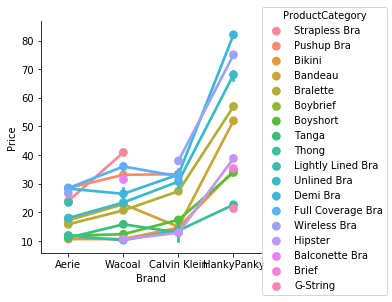

In [42]:
g = sns.factorplot(x="BrandName", y="Price", hue="ProductCategory", data=lingerieData)
g.set_xlabels('Brand')

In [43]:
# HankyPanky is most expensive brand by far

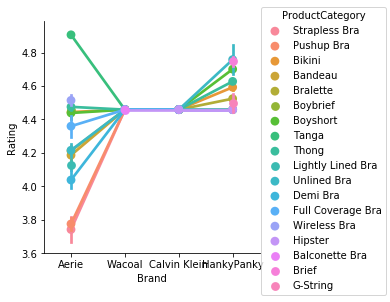

In [44]:
# Let's do a factorplot with Rating as our y variable, see who is highest rated
g = sns.factorplot(x="BrandName", y="Rating", hue="ProductCategory", data=lingerieData)
g.set_xlabels('Brand')

In [45]:
# Interesting
# Aerie has the biggest spread of ratings - both the lowest and highest
# Aerie customers are lukewarm on their pushup and strapless bras
# But Aerie customers love their boyshort panties and are pretty happy with all other products
# Wacoal and Calvin Klein don't have much spread; all items are solidly in the upper 4's
# HankyPanky is upper 4's and higher for all products
# HankyPanky's briefs and full coverage bras seem to get highest marks
# HankyPanky's highest ratings are amusing as they're known for their super-sexy offerings

In [46]:
# Let's do this by just SuperCategory i.e. bras vs. panties

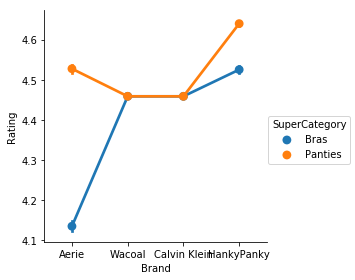

In [47]:
g = sns.factorplot(x="BrandName", y="Rating", hue="SuperCategory", data=lingerieData)
g.set_xlabels('Brand')

In [48]:
# Aerie gets much lower marks on bras than panties
# HankyPanky scores high on both
# Wacoal and Calvin Klein are even on both

In [49]:
# Let's see basic pricing rank for bras vs. panties across the brands

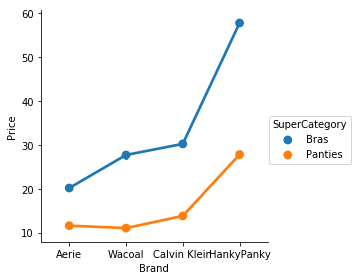

In [50]:
g = sns.factorplot(x="BrandName", y="Price", hue="SuperCategory", data=lingerieData)
g.set_xlabels('Brand')

In [51]:
# Aerie is overall cheapest
# HankyPanky most expensive, by far. Bras are VERY expensive, more than twice as much as Aerie
# And at least twice as expensive as Wacoal and Calvin Klein

In [52]:
# Building a price table based on code found on Kaggle for another version of this data set
df = pd.DataFrame(lingerieData.groupby('BrandName').Price.min()).reset_index()
df2 = pd.DataFrame(lingerieData.groupby('BrandName').Price.max()).reset_index()
df = df.merge(df2, on='BrandName')
display(df)

,BrandName,Price_x,Price_y
0,Aerie,4,35
1,Calvin Klein,7,58
2,HankyPanky,15,82
3,Wacoal,8,44


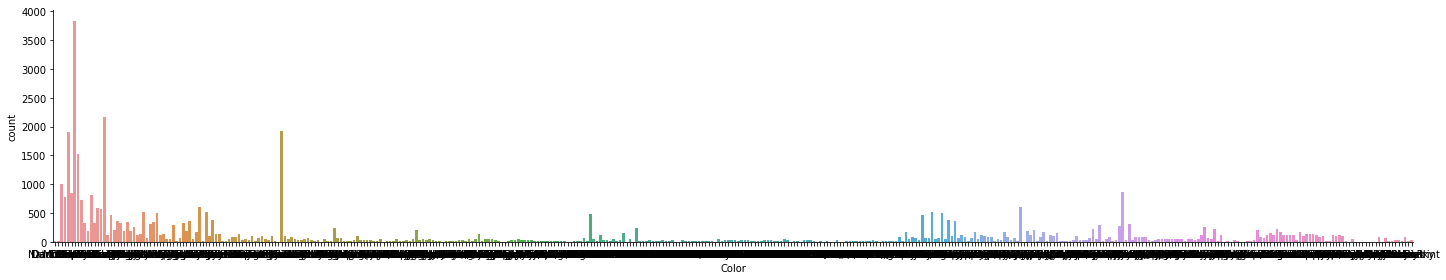

In [53]:
# Let's look at color offerings for bras and panties
fg = sns.factorplot('Color', data=lingerieData, kind='count', aspect=5)
fg.set_xlabels('Color')

In [54]:
# There's a lot of colors available. Can't read the plot to see what's most popular. Ha!
# Text will be easier for this one

In [55]:
lingerieData.groupby(['BrandName', 'SuperCategory', 'Color'])['BrandName'].count()

BrandName  SuperCategory  Color                  
Aerie      Bras           Alpha Turquoise            334
                          Ballet Pink                168
                          Balmy Teal                   7
                          Be Pretty                  101
                          Blue Heather                46
                          Bright Blue                 65
                          Bright Cobalt               11
                          Bright Neon Green            8
                          Buff                        83
                          Charcoal Heather            42
                          Classic Blue                43
                          Coral                       57
                          Creme Blue                 244
                          Crystal                      7
                          Current Coral              233
                          Dark Heather                71
                          Dark Nude   

In [56]:
# That's a lot of colors!
# How many colors available at each brand overall?
display(lingerieData.groupby('BrandName').Color.nunique())

BrandName
Aerie            85
Calvin Klein     98
HankyPanky      165
Wacoal           74
Name: Color, dtype: int64

In [57]:
# HankyPanky has most colors available overall, with CK coming in second
# I thought Aerie would at least be second! 

In [58]:
# And sorted by SuperCategory?
display(lingerieData.groupby(['BrandName', 'SuperCategory']).Color.nunique())

BrandName     SuperCategory
Aerie         Bras              71
              Panties           48
Calvin Klein  Bras              49
              Panties           80
HankyPanky    Bras              75
              Panties          161
Wacoal        Bras              54
              Panties           66
Name: Color, dtype: int64

In [59]:
# HankyPanky offers the most colors of panties; again CK is second.
# HankyPanky wins bra colors, too

In [60]:
# And for each Product Category?
display(lingerieData.groupby(['BrandName', 'ProductCategory']).Color.nunique())

BrandName     ProductCategory  
Aerie         Bandeau               13
              Bikini                13
              Boybrief              37
              Boyshort              10
              Bralette              45
              Demi Bra              11
              Full Coverage Bra     15
              Lightly Lined Bra     30
              Pushup Bra            30
              Strapless Bra         11
              Tanga                 24
              Thong                 30
              Unlined Bra           31
              Wireless Bra           9
Calvin Klein  Bandeau                1
              Bikini                49
              Boyshort               7
              Bralette              32
              Demi Bra              13
              Full Coverage Bra      8
              Hipster               45
              Pushup Bra            14
              Tanga                  3
              Thong                 56
              Unlined Bra       

In [61]:
# And for each product by name?
display(lingerieData.groupby(['BrandName', 'ProductName']).Color.nunique())

BrandName  ProductName                                       
Aerie      Aerie Adjustable Low-Back Strap                        1
           Aerie Backless Bare Bra                                1
           Aerie Backless Pushup Bare Bra                         2
           Aerie Backless U Plunge Bare Bra                       1
           Aerie Bikini                                           8
           Aerie Boho Bandeau                                     2
           Aerie Boho Bralette + Mesh                             7
           Aerie Boho Halter Bralette                             9
           Aerie Boho Plunge Bralette                             6
           Aerie Boho Racerback Bralette                          9
           Aerie Boybrief                                        21
           Aerie Boyshort                                         8
           Aerie Cheeky                                          17
           Aerie Classic Lace Bralette                

In [62]:
# Attempting a color boxplot based on code from original data set on Kaggle

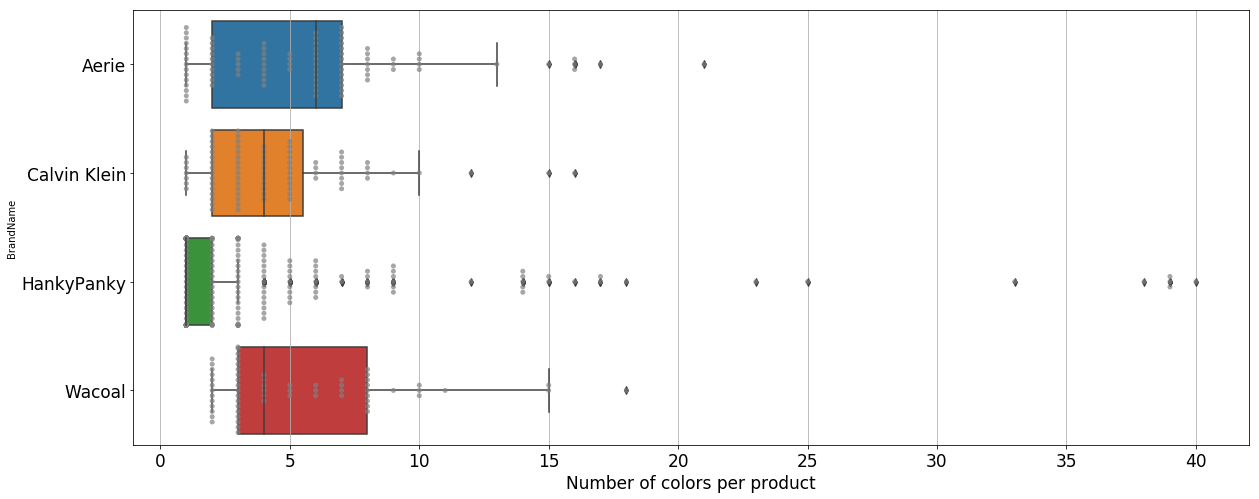

In [63]:
colors_df = pd.DataFrame()    
for name, group in lingerieData.groupby('BrandName'):
    colors = group.groupby(['ProductName']).Color.nunique()
    colors_df = colors_df.append(pd.DataFrame({'color_num': colors, 'BrandName': name}))

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,8))
ax = sns.boxplot(x='color_num', y = 'BrandName', data = colors_df, ax = axes, medianprops={"zorder":3})
ax = sns.swarmplot(x="color_num", y="BrandName", data=colors_df, color= 'grey', alpha = 0.7)
ax.xaxis.grid(True)
_ = ax.set_xlabel('Number of colors per product', fontsize=17)
_= ax.tick_params(axis='both', which='major', labelsize=17)

In [64]:
# HankyPanky has some products with 40 different color offerings! 
# Aerie has the second largest offerings, with at least one product having more than 20 color options
# HankyPanky has lowest average number of colors-per-product, while Wacoal has the highest. 
# Wacoal has fewer products with more colors available for each
# HankyPanky has more product, but fewer colors available on average, for each.

In [65]:
# I want to try replicating another more complicated analysis
# This time, most popular color at each brand

In [66]:
# Code tweaked from Kaggle example

colors_first = lingerieData.groupby(['BrandName','Color'])['Color'].agg({'count_fir':'count'})
df_count_first = colors_first.groupby(level=0).agg('idxmax')
df_count_first = colors_first.loc[df_count_first['count_fir']].reset_index()

data_mod = lingerieData[~lingerieData['Color'].isin(df_count_first.Color.unique())]
colors_second = data_mod.groupby(['BrandName','Color'])['Color'].agg({'count_sec':'count'})
df_count_second = colors_second.groupby(level=0).agg('idxmax')
df_count_second = colors_second.loc[df_count_second['count_sec']].reset_index()

df = df_count_first.merge(df_count_second,on = 'BrandName')
df.columns = ['BrandName', '1st color', 'count 1st color', '2nd color', 'count 2nd color']
display(df)

for x in [df_count_first, df_count_second, df, data_mod, colors_first]:
    del x

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,BrandName,1st color,count 1st color,2nd color,count 2nd color
0,Aerie,True Black,3834,Navy,1891
1,Calvin Klein,BLACK,477,WHITE,246
2,HankyPanky,Black,1903,Chai,866
3,Wacoal,Night,236,Wild Aster,95


In [67]:
# Black being the most popular is not entirely surprising
# Wonder if that was influenced by shades of nude being split up across 2-4 shades of what would be considered "nude"

In [68]:
# Let's do some predictive analytics 
# Using Classification algorithms

In [13]:
# Algorithms
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# Metrics Operators
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

# Cross-validation tools
from sklearn.cross_validation import train_test_split


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Prediction file so we have it when we're ready
lingerieDataPred = pd.read_csv("Lingerie_Data_Predictions.csv")
lingerieDataPred.head()

,ProductName,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color,RatingPrediction
0,1,44,1,1,1,1,1,1,1,0
1,1,44,1,1,1,1,1,1,1,0
2,1,44,1,1,1,1,1,1,1,0
3,1,44,1,1,1,1,1,1,1,0
4,1,44,1,1,1,1,1,1,1,0


In [15]:
# Looks like it uploaded okay
# Setting aside
# Let's go back to our primary data for analyzing algorithm performance

In [16]:
# Because attribute info was text before, had to modify the data set to convert the data into numeric format
# Now have to upload our Training & Testing Set
# This is same data as our EDA, just with integers substituted for text
# Two attributes were removed as well
# Description and StyleAttributes
# Information in those fields was noisy/messy; did not feel useful to our analysis

In [17]:
lingerieDataTT = pd.read_csv("Lingerie_Data_TrainTest.csv")
lingerieDataTT.head()

,ProductName,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color,Rating
0,1,11,2,10,2,2,1,1,1,3
1,1,11,2,10,2,2,1,1,1,3
2,1,11,2,10,2,2,1,1,1,3
3,1,11,2,10,2,2,1,1,1,3
4,1,11,2,10,2,2,1,1,1,3


In [18]:
# Review data types
lingerieDataTT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26978 entries, 0 to 26977
Data columns (total 10 columns):
ProductName        26978 non-null int64
Price              26978 non-null int64
BrandName          26978 non-null int64
ProductCategory    26978 non-null int64
SuperCategory      26978 non-null int64
Retailer           26978 non-null int64
TotalSizes         26978 non-null int64
AvailSize          26978 non-null int64
Color              26978 non-null int64
Rating             26978 non-null int64
dtypes: int64(10)
memory usage: 2.1 MB


In [19]:
# Check for NaN's
print(lingerieDataTT.isnull().sum())

ProductName        0
Price              0
BrandName          0
ProductCategory    0
SuperCategory      0
Retailer           0
TotalSizes         0
AvailSize          0
Color              0
Rating             0
dtype: int64


In [20]:
# No nulls, as expected

In [21]:
lingerieDataTT.head()

,ProductName,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color,Rating
0,1,11,2,10,2,2,1,1,1,3
1,1,11,2,10,2,2,1,1,1,3
2,1,11,2,10,2,2,1,1,1,3
3,1,11,2,10,2,2,1,1,1,3
4,1,11,2,10,2,2,1,1,1,3


In [22]:
# Covariance

In [23]:
covMat = lingerieDataTT.cov()
print(covMat)

                  ProductName        Price  BrandName  ProductCategory  \
ProductName      44676.689187  1231.593420 -90.578808      -164.259317   
Price             1231.593420    87.078344  -2.528268        -0.247855   
BrandName          -90.578808    -2.528268   0.202618         0.487327   
ProductCategory   -164.259317    -0.247855   0.487327        16.650106   
SuperCategory      -36.854892     0.857884   0.093505         0.485423   
Retailer           -90.578808    -2.528268   0.202618         0.487327   
TotalSizes        2501.704864   145.966356  -5.864521       -13.796102   
AvailSize         4394.533589   675.879427  -3.282418       247.617429   
Color            21957.712855   579.582570 -47.673723      -122.900981   
Rating              45.450976     0.461891  -0.099546        -0.222854   

                 SuperCategory   Retailer   TotalSizes     AvailSize  \
ProductName         -36.854892 -90.578808  2501.704864   4394.533589   
Price                 0.857884  -2.528268

In [24]:
# Correlation

In [25]:
corrMat = lingerieDataTT.corr()
print(corrMat)

                 ProductName     Price  BrandName  ProductCategory  \
ProductName         1.000000  0.624413  -0.952023        -0.190450   
Price               0.624413  1.000000  -0.601907        -0.006509   
BrandName          -0.952023 -0.601907   1.000000         0.265322   
ProductCategory    -0.190450 -0.006509   0.265322         1.000000   
SuperCategory      -0.354712  0.187023   0.422590         0.242010   
Retailer           -0.952023 -0.601907   1.000000         0.265322   
TotalSizes          0.544391  0.719470  -0.599251        -0.155512   
AvailSize           0.131581  0.458391  -0.046151         0.384056   
Color               0.840772  0.502680  -0.857180        -0.243769   
Rating              0.299375  0.068912  -0.307893        -0.076037   

                 SuperCategory  Retailer  TotalSizes  AvailSize     Color  \
ProductName          -0.354712 -0.952023    0.544391   0.131581  0.840772   
Price                 0.187023 -0.601907    0.719470   0.458391  0.502680  

In [26]:
# Feature Selection

In [27]:
features = lingerieDataTT.iloc[:,1:9]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color
0,11,2,10,2,2,1,1,1
1,11,2,10,2,2,1,1,1
2,11,2,10,2,2,1,1,1
3,11,2,10,2,2,1,1,1
4,11,2,10,2,2,1,1,1


In [28]:
# Select dependent variable

In [29]:
depVar = lingerieDataTT['Rating']

In [30]:
# create Training Set for X variables

In [31]:
X_train = (features[: 18884])
X_train.head()

,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color
0,11,2,10,2,2,1,1,1
1,11,2,10,2,2,1,1,1
2,11,2,10,2,2,1,1,1
3,11,2,10,2,2,1,1,1
4,11,2,10,2,2,1,1,1


In [32]:
# create Training Set for Y variable

In [33]:
y_train = depVar[: 18884]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 18884


0    3
1    3
2    3
3    3
4    3
Name: Rating, dtype: int64

In [34]:
# create Testing Set for X variables

In [35]:
X_test = features[-8093:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 8093
       Price  BrandName  ProductCategory  SuperCategory  Retailer  TotalSizes  \
18885     21          2               12              2         2          13   
18886     21          2               12              2         2          13   
18887     21          2               12              2         2          13   
18888     21          2               12              2         2          13   
18889     21          2               12              2         2          13   

       AvailSize  Color  
18885        232      7  
18886        232     16  
18887        232      7  
18888        232     16  
18889        232      7  


In [36]:
# create Testing Set for Y variable; establish Ground Truth

In [37]:
y_test = depVar[:-8093]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 18885


0    3
1    3
2    3
3    3
4    3
Name: Rating, dtype: int64

In [38]:
# Cross validation

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((14163, 8), (4721, 8))

In [40]:
# Models we'll be using

In [41]:
modelRF = RandomForestRegressor()
modelSVR = SVR()
modelLR = LinearRegression()

In [42]:
# Fit the data to the models

In [43]:
# Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
# Support Vector Regression
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# Check the training Score for each

In [52]:
# Random Forest
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.68702945 0.67055348 0.69338254]


0.728392424780882

In [53]:
# Support Vector Regression
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train,y_train)

[0.5769017  0.56079944 0.55585811]


0.6175348116259891

In [54]:
# Linear Regression
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[0.09155679 0.09203611 0.09445026]


0.09389089523489258

In [55]:
# Make Predictions
# Choose model
# We'll do Random Forest 
# Has best #'s

In [56]:
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.696
RMSE: 0.420


In [57]:
# Plot the results
# Using Scatterplot

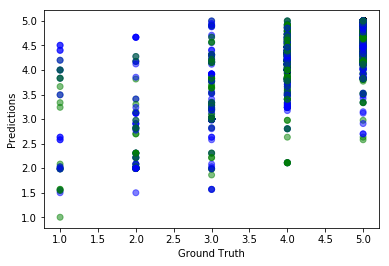

In [58]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [59]:
# Now let's make some real predictions

In [60]:
lingerieDataPred = pd.read_csv("Lingerie_Data_Predictions.csv")
lingerieDataPred.head()

,ProductName,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color,RatingPrediction
0,1,44,1,1,1,1,1,1,1,0
1,1,44,1,1,1,1,1,1,1,0
2,1,44,1,1,1,1,1,1,1,0
3,1,44,1,1,1,1,1,1,1,0
4,1,44,1,1,1,1,1,1,1,0


In [61]:
lingerieDataPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 10 columns):
ProductName         11578 non-null int64
Price               11578 non-null int64
BrandName           11578 non-null int64
ProductCategory     11578 non-null int64
SuperCategory       11578 non-null int64
Retailer            11578 non-null int64
TotalSizes          11578 non-null int64
AvailSize           11578 non-null int64
Color               11578 non-null int64
RatingPrediction    11578 non-null int64
dtypes: int64(10)
memory usage: 904.6 KB


In [62]:
# Feature Selection

In [63]:
featuresPred = lingerieDataPred.iloc[:,1:9]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Price,BrandName,ProductCategory,SuperCategory,Retailer,TotalSizes,AvailSize,Color
0,11,2,10,2,2,1,1,1
1,11,2,10,2,2,1,1,1
2,11,2,10,2,2,1,1,1
3,11,2,10,2,2,1,1,1
4,11,2,10,2,2,1,1,1


In [64]:
# Select dependent variable

In [65]:
depVar = lingerieDataPred['RatingPrediction']

In [66]:
# Make Predictions

In [67]:
X,y = featuresPred, lingerieDataPred.RatingPrediction

In [68]:
predictions = modelRF.predict(X)
predRsquared = r2_score(y,predictions)
rmse = sqrt(mean_squared_error(y, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.000
RMSE: 4.171


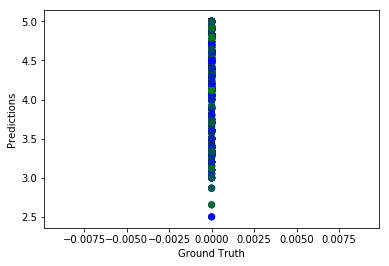

In [69]:
plt.scatter(y, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [71]:
# Predicted ratings are pretty evenly scattered, but definitely more concentrated at the top of the scale